In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Download MNIST Dataset

Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [13]:
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

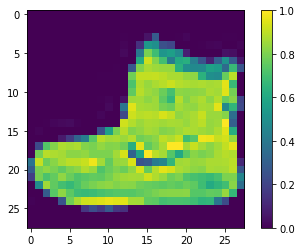

In [20]:
# show data image
def show_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.gca().grid(False)

show_image(train_images[0])

## Data scale
before feed image data into neural network, first we scale data value to 0 ~ 1 

In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

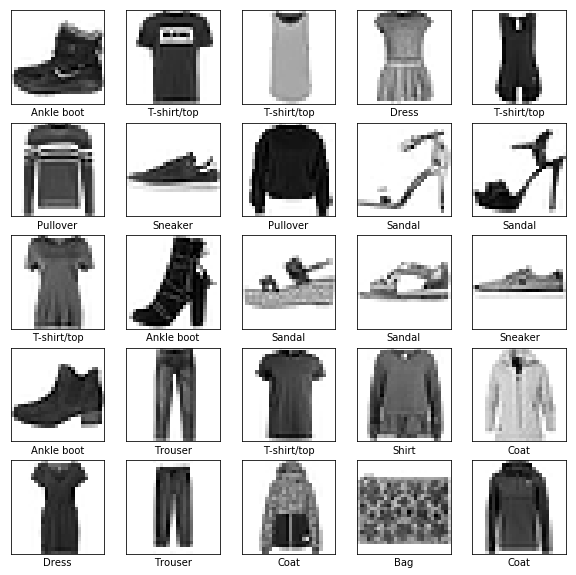

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build model
build a two layers model and compile it 

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, keras.activations.relu),
    keras.layers.Dense(10, keras.activations.softmax)
])

In [26]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [28]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2799 - acc: 0.8973
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2673 - acc: 0.9004
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2549 - acc: 0.9061
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2464 - acc: 0.9084
Epoch 5/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2365 - acc: 0.9114


In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 19us/step
Test accuracy: 0.8806


In [35]:
predictions =  model.predict(test_images)

In [42]:
pred_result = np.argmax(predictions, axis=1)

/home/ubuntu/miniconda3/envs/dl/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


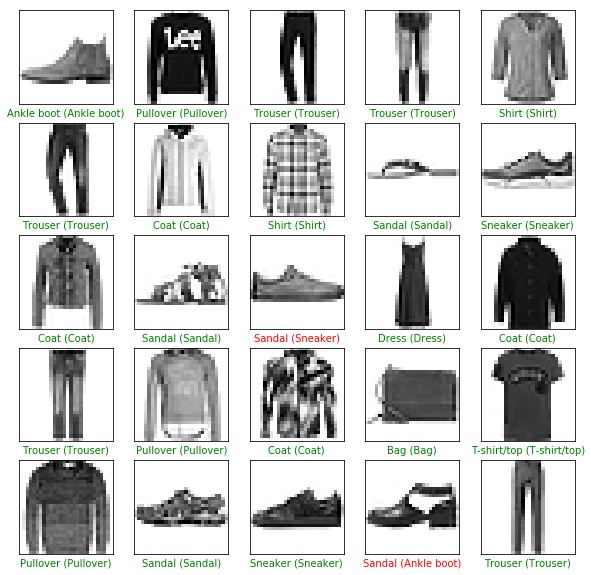

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
